## A) Import libs

In [1]:
#import libs
import numpy as np 
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt 
# import math
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
# import ipywidgets as widgets
# from ipywidgets import interact
from torch.optim.lr_scheduler import ReduceLROnPlateau
import random

# import files 
from DataSet import DataSet
from DataGen import DataGen 
from FixedGP import FixedGP 
from DataGen import DataGen
from DataAugmentation import augment_with_horizontal_flip, augment_with_vertical_flip, augment_with_opposit_map_values
from utilities import standardize_vector, map_plot, labeled_inputs_plot, compare_output_label, plot_combinations
#from MapUpdateNetwork import MapUpdateNetwork

## B) Load data from pth file

In [6]:
def concatenate_dataset(input_files):
    """
    Concatène les données de plusieurs fichiers.

    Args:
        input_files (list of str): Liste des chemins des fichiers à charger.
    """
    # Initialisation des listes pour stocker les données concaténées
    all_train_input = []
    all_train_label = []
    all_descriptions = []

    # Charger et concaténer les données
    for file in input_files:
        loaded_data = torch.load(file, weights_only=True)
        all_train_input.append(loaded_data["train_input"])
        all_train_label.append(loaded_data["train_label"])
        all_descriptions.append(loaded_data["description"])

    # Concaténer les tenseurs et les listes
    concatenated_train_input = torch.cat(all_train_input, dim=0)
    concatenated_train_label = torch.cat(all_train_label, dim=0)
    concatenated_description = "; ".join(all_descriptions)

    # Sauvegarder les données concaténées
    output_data = {
        "train_input": concatenated_train_input,
        "train_label": concatenated_train_label,
        "description": concatenated_description,
    }
    return(output_data)

In [ ]:
input_files = ['dataset/emgALL/og_A_5que_10kcomb_rat1_emgALL.pth',
               'dataset/emgALL/og_A_5que_10kcomb_rat2_emgALL.pth',
               'dataset/emgALL/og_A_5que_10kcomb_rat3_emgALL.pth',
               'dataset/emgALL/og_A_5que_10kcomb_rat4_emgALL.pth',
              ]

# Load the saved data from a .pth file using PyTorch
loaded_data_1 = concatenate_dataset(input_files)
# The 'weights_only=True' argument ensures that only the model weights (not the entire model) are loaded

# Access the tensors and the description from the loaded data
train_input = loaded_data_1["train_input"]  # The input data for training
train_label = loaded_data_1["train_label"]  # The corresponding labels for the training data
loaded_description = loaded_data_1["description"]  # The description or metadata associated with the data

print(loaded_description)

These labeled inputs have the original form.
These labeled inputs were made with these parameters:
 name: A_5que_10kcomb_rat1_emg1
 nb_queries: 5
 nb_comb: 10000
 kernel_type: Mat52
 noise_std: 0.1
 output_std: 3
 lengthscale: [0.14285714285714285, 0.3333333333333333]; These labeled inputs have the original form.
These labeled inputs were made with these parameters:
 name: A_5que_10kcomb_rat1_emg2
 nb_queries: 5
 nb_comb: 10000
 kernel_type: Mat52
 noise_std: 0.1
 output_std: 3
 lengthscale: [0.14285714285714285, 0.3333333333333333]; These labeled inputs have the original form.
These labeled inputs were made with these parameters:
 name: A_5que_10kcomb_rat1_emg3
 nb_queries: 5
 nb_comb: 10000
 kernel_type: Mat52
 noise_std: 0.1
 output_std: 3
 lengthscale: [0.14285714285714285, 0.3333333333333333]; These labeled inputs have the original form.
These labeled inputs were made with these parameters:
 name: A_5que_10kcomb_rat1_emg4
 nb_queries: 5
 nb_comb: 10000
 kernel_type: Mat52
 noise_s

In [ ]:
input_files = ['dataset/emgALL/og_A_5que_10kcomb_rat5_emgALL.pth',
              ]

# Load the saved data from a .pth file using PyTorch
loaded_data_2 = concatenate_dataset(input_files)
# The 'weights_only=True' argument ensures that only the model weights (not the entire model) are loaded

# Access the tensors and the description from the loaded data
test_input = loaded_data_2["train_input"]  # The input data for training
test_label = loaded_data_2["train_label"]  # The corresponding labels for the training data
loaded_description = loaded_data_2["description"]  # The description or metadata associated with the data

print(loaded_description)

These labeled inputs have the original form.
These labeled inputs were made with these parameters:
 name: A_5que_10kcomb_rat5_emg1
 nb_queries: 5
 nb_comb: 10000
 kernel_type: Mat52
 noise_std: 0.1
 output_std: 3
 lengthscale: [0.14285714285714285, 0.3333333333333333]; These labeled inputs have the original form.
These labeled inputs were made with these parameters:
 name: A_5que_10kcomb_rat5_emg2
 nb_queries: 5
 nb_comb: 10000
 kernel_type: Mat52
 noise_std: 0.1
 output_std: 3
 lengthscale: [0.14285714285714285, 0.3333333333333333]; These labeled inputs have the original form.
These labeled inputs were made with these parameters:
 name: A_5que_10kcomb_rat5_emg3
 nb_queries: 5
 nb_comb: 10000
 kernel_type: Mat52
 noise_std: 0.1
 output_std: 3
 lengthscale: [0.14285714285714285, 0.3333333333333333]; These labeled inputs have the original form.
These labeled inputs were made with these parameters:
 name: A_5que_10kcomb_rat5_emg4
 nb_queries: 5
 nb_comb: 10000
 kernel_type: Mat52
 noise_s

In [ ]:
input_files = ['dataset/emgALL/og_A_5que_10kcomb_rat6_emgALL.pth',
              ]

# Load the saved data from a .pth file using PyTorch
loaded_data_3 = concatenate_dataset(input_files) 
# The 'weights_only=True' argument ensures that only the model weights (not the entire model) are loaded

# Access the tensors and the description from the loaded data
validation_input = loaded_data_3["train_input"]  # The input data for training
validation_label = loaded_data_3["train_label"]  # The corresponding labels for the training data
loaded_description = loaded_data_3["description"]  # The description or metadata associated with the data

print(loaded_description)

These labeled inputs have the original form.
These labeled inputs were made with these parameters:
 name: A_5que_10kcomb_rat6_emg1
 nb_queries: 5
 nb_comb: 10000
 kernel_type: Mat52
 noise_std: 0.1
 output_std: 3
 lengthscale: [0.14285714285714285, 0.3333333333333333]; These labeled inputs have the original form.
These labeled inputs were made with these parameters:
 name: A_5que_10kcomb_rat6_emg2
 nb_queries: 5
 nb_comb: 10000
 kernel_type: Mat52
 noise_std: 0.1
 output_std: 3
 lengthscale: [0.14285714285714285, 0.3333333333333333]; These labeled inputs have the original form.
These labeled inputs were made with these parameters:
 name: A_5que_10kcomb_rat6_emg3
 nb_queries: 5
 nb_comb: 10000
 kernel_type: Mat52
 noise_std: 0.1
 output_std: 3
 lengthscale: [0.14285714285714285, 0.3333333333333333]; These labeled inputs have the original form.
These labeled inputs were made with these parameters:
 name: A_5que_10kcomb_rat6_emg4
 nb_queries: 5
 nb_comb: 10000
 kernel_type: Mat52
 noise_s

### Visualize the labeled data 

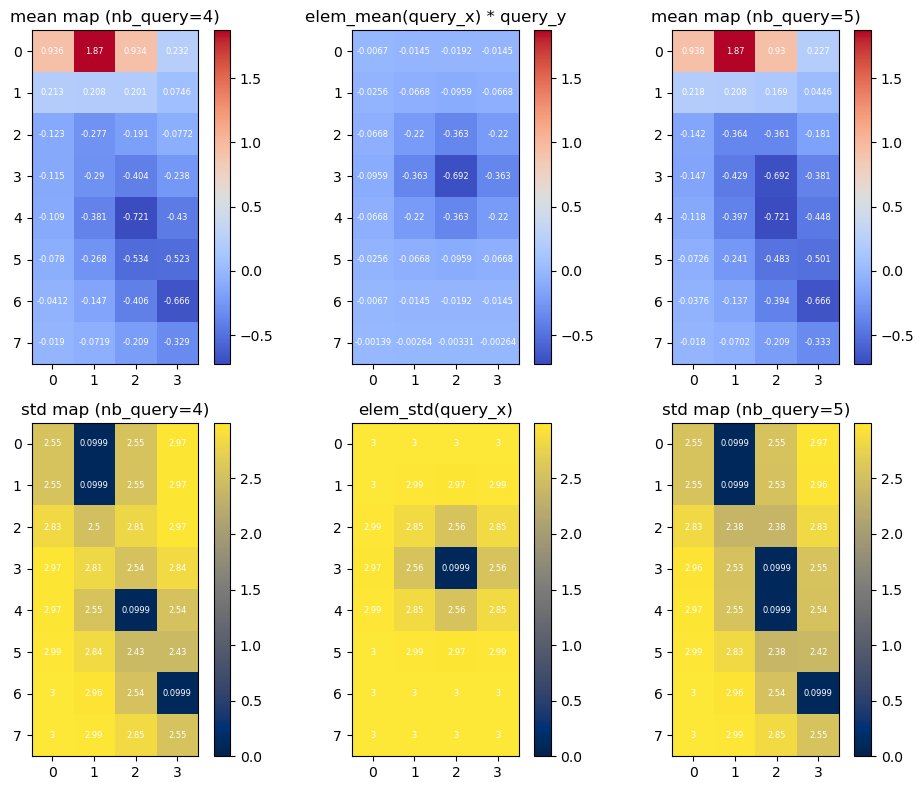

In [32]:
labeled_inputs_plot(train_input=train_input, train_label=train_label, comb_idx=0, values=True)

## C) Build NN model

In [33]:
class MapUpdateNetwork_1(nn.Module):
    """
    A convolutional neural network designed for processing and updating map-like structures.
    The network takes four input images as input, encodes their features, and decodes them 
    to generate an output map of the same spatial dimensions as the inputs.

    Attributes:
        encoder (nn.Sequential): Encoder that reduces spatial dimensions and extracts high-level features.
        decoder (nn.Sequential): Decoder that reconstructs the spatial dimensions from encoded features.

    Methods:
        __init__(in_channels, out_channels, out_channels_first_conv):
            Initializes the network with configurable input/output channels and feature depth.
        forward(img1, img2, img3, img4):
            Performs the forward pass by concatenating the input images, encoding their features, 
            and decoding them to produce the final map.
    """

    def __init__(self, in_channels=4, out_channels=2, out_channels_first_conv=16):
        """
        Initializes the MapUpdateNetwork.

        Args:
            in_channels (int): Number of input channels. Defaults to 4 (for concatenated input images).
            out_channels (int): Number of output channels. Defaults to 2.
            out_channels_first_conv (int): Number of channels in the first convolutional layer. Defaults to 16.
        """
        super(MapUpdateNetwork_1, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels, out_channels_first_conv, kernel_size=3, stride=1, padding=1), # 4 x 8x4 => 16 x 8x4
            nn.ReLU(),
            nn.Conv2d(out_channels_first_conv, 2*out_channels_first_conv, kernel_size=3, stride=2, padding=1), # 16 x 8x4 => 32 x 4x2
            nn.ReLU(),
            nn.Conv2d(2*out_channels_first_conv, 4*out_channels_first_conv, kernel_size=3, stride=1, padding=1), # 32 x 4x2 => 64 x 4x2
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(4*out_channels_first_conv, 2*out_channels_first_conv, kernel_size=3, stride=1, padding=1), # 64 x 4x2 => 32 x 4x2
            nn.ReLU(),
            nn.ConvTranspose2d(2*out_channels_first_conv, out_channels_first_conv, kernel_size=3, stride=2, padding=1, output_padding=1), # 32 x 4x2 => 16 x 8x4
            nn.ReLU()
        )
        self.final_layer1 = nn.Conv2d(out_channels_first_conv, 1, kernel_size=3, stride=1, padding=1) # 16 x 8x4 => 1 x 8x4
        self.final_layer2 = nn.Sequential(
            nn.Conv2d(out_channels_first_conv, 1, kernel_size=3, stride=1, padding=1), # 16 x 8x4 => 1 x 8x4
            nn.Sigmoid()
        )

        self.train_losses = []
        self.validation_losses = []

    def forward(self, img1, img2, img3, img4):
        """
        Forward pass of the network. Combines four input images, processes them through
        an encoder-decoder architecture, and outputs an updated map.

        Args:
            img1 (torch.Tensor): First input image tensor of shape (B, C, H, W).
            img2 (torch.Tensor): Second input image tensor of shape (B, C, H, W).
            img3 (torch.Tensor): Third input image tensor of shape (B, C, H, W).
            img4 (torch.Tensor): Fourth input image tensor of shape (B, C, H, W).

        Returns:
            torch.Tensor: Output map tensor of shape (B, out_channels, H, W), where 
                          H and W are the height and width of the input images.
        """
        x = torch.cat((img1, img2, img3, img4), dim=1)
        x = self.encoder(x)
        x = self.decoder(x)
        channel1 = self.final_layer1(x)  # Output non contraint
        channel2 = 3 * self.final_layer2(x)  # Contraint entre [0, 3]
        return torch.cat((channel1, channel2), dim=1)

In [34]:
class MapUpdateNetwork_2(nn.Module):
    def __init__(self, in_channels=4, out_channels_first_conv=16):
        super(MapUpdateNetwork_2, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels=in_channels, out_channels=out_channels_first_conv, kernel_size=3, stride=1, padding=1), # 4 x 8x4 => 16 x 8x4
            nn.ReLU(),
            nn.Conv2d(out_channels_first_conv, 2*out_channels_first_conv, kernel_size=3, stride=2, padding=1), # 16 x 8x4 => 32 x 4x2
            nn.ReLU(),
            nn.Conv2d(2*out_channels_first_conv, 4*out_channels_first_conv, kernel_size=3, stride=1, padding=1), # 32 x 4x2 => 64 x 4x2
            nn.ReLU()
        )
        
        # Decoder for 2 outputs 
        self.decoder_shared = nn.ConvTranspose2d(4*out_channels_first_conv, out_channels_first_conv, kernel_size=3, stride=2, padding=1, output_padding=1) # 64 x 4x2 => 16 x 8x2
        self.decoder_output1 = nn.Conv2d(out_channels_first_conv, 1, kernel_size=3, stride=1, padding=1) # 16 x 8x4 => 1 x 8x4
        self.decoder_output2 = nn.Sequential(
            nn.Conv2d(out_channels_first_conv, 1, kernel_size=3, stride=1, padding=1), # 16 x 8x4 => 1 x 8x4
            nn.Sigmoid()  # Normalisation [0, 1]
        )

        self.train_losses = []
        self.validation_losses = []

    def forward(self, img1, img2, img3, img4):
        x = torch.cat((img1, img2, img3, img4), dim=1)
        x = self.encoder(x)
        x = self.decoder_shared(x)
        
        # 2 different outputs 
        output1 = self.decoder_output1(x)  
        output2 = self.decoder_output2(x) * 3  # Rescale pour [0, 3]
        
        return torch.cat((output1, output2), dim=1)


In [35]:
class MapUpdateNetwork_3(nn.Module):
    def __init__(self, in_channels=4, out_channels_first_conv=16):
        super(MapUpdateNetwork_3, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels=in_channels, out_channels=out_channels_first_conv, kernel_size=3, stride=1, padding=1), # 4 x 8x4 => 16 x 8x4
            nn.ReLU(),
            nn.Conv2d(out_channels_first_conv, 2*out_channels_first_conv, kernel_size=3, stride=2, padding=1), # 16 x 8x4 => 32 x 4x2
            nn.ReLU(),
            nn.Conv2d(2*out_channels_first_conv, 4*out_channels_first_conv, kernel_size=3, stride=1, padding=1), # 32 x 4x2 => 64 x 4x2
            nn.ReLU()
        )
        
        # Decoder for 2 outputs 
        self.decoder_shared = nn.Sequential(
            nn.ConvTranspose2d(4*out_channels_first_conv, out_channels_first_conv, kernel_size=3, stride=2, padding=1, output_padding=1), # 64 x 4x2 => 16 x 8x2
            nn.ReLU()
        )
        self.decoder_output1 = nn.Conv2d(out_channels_first_conv, 1, kernel_size=3, stride=1, padding=1) # 16 x 8x4 => 1 x 8x4
        self.decoder_output2 = nn.Sequential(
            nn.Conv2d(out_channels_first_conv, 1, kernel_size=3, stride=1, padding=1), # 16 x 8x4 => 1 x 8x4
            nn.Sigmoid()  # Normalisation [0, 1]
        )

        self.train_losses = []
        self.validation_losses = []

    def forward(self, img1, img2, img3, img4):
        x = torch.cat((img1, img2, img3, img4), dim=1)
        x = self.encoder(x)
        x = self.decoder_shared(x)
        
        # 2 different outputs 
        output1 = self.decoder_output1(x)  
        output2 = self.decoder_output2(x) * 3  # Rescale pour [0, 3]
        
        return torch.cat((output1, output2), dim=1)

## D) Training settings

In [36]:
train_X = train_input
train_Y = train_label

validation_X = validation_input
validation_Y = validation_label

test_X = test_input
test_Y = test_label

### Augment training data

In [37]:
print(train_X.shape)

torch.Size([270000, 4, 8, 4])


In [38]:
train_X, train_Y = augment_with_horizontal_flip(train_X, train_Y)
train_X, train_Y = augment_with_vertical_flip(train_X, train_Y)
train_X, train_Y = augment_with_opposit_map_values(train_X, train_Y)

In [39]:
print(train_X.shape)
print(validation_X.shape)
print(test_X.shape)

torch.Size([2160000, 4, 8, 4])
torch.Size([80000, 4, 8, 4])
torch.Size([50000, 4, 8, 4])


In [40]:
ind_train = random.sample(range(len(train_X)), 1280000)
train_X = train_X[ind_train]
train_Y = train_Y[ind_train]

ind_validation = random.sample(range(len(validation_X)), 64000)
validation_X = validation_X[ind_validation]
validation_Y = validation_Y[ind_validation]

ind_test = random.sample(range(len(test_X)), 38400)
test_X = test_X[ind_test]
test_Y = test_Y[ind_test]

### Set hyperparameters

In [53]:
# Assuming train_X, train_Y, validation_X, validation_Y, test_X, test_Y are provided
batch_size = 128  # Batch size for DataLoader

# Create datasets and data loaders
train_dataset = TensorDataset(train_X, train_Y)
validation_dataset = TensorDataset(validation_X, validation_Y)
test_dataset = TensorDataset(test_X, test_Y)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
validation_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

criterion1 = nn.MSELoss()
criterion2 = nn.MSELoss()  # Si les valeurs dans [0, 3] représentent des classes discrètes

def custom_loss(output, targets):
    target1 = targets[:, 0]  # Extraire les cibles pour le premier canal
    target2 = targets[:, 1]  # Extraire les cibles pour le deuxième canal
    loss1 = criterion1(output[:, 0], target1)
    loss2 = criterion2(output[:, 1], target2) 
    return loss1 + loss2

In [30]:
"""
# Initialize model, loss function, and optimizer
device = "cuda" if torch.cuda.is_available() else "cpu"
model = MapUpdateNetwork()

optimizer = optim.Adam(model.parameters(), lr=1e-3)
"""

'\n# Initialize model, loss function, and optimizer\ndevice = "cuda" if torch.cuda.is_available() else "cpu"\nmodel = MapUpdateNetwork()\n\noptimizer = optim.Adam(model.parameters(), lr=1e-3)\n'

In [ ]:
# Define training function
def train_model(model, train_loader, validation_loader, criterion_function, optimizer, scheduler, num_epochs=20, device="cpu"):
    """
    Trains the given model using the provided data loaders.

    Args:
        model (nn.Module): The neural network to train.
        train_loader (DataLoader): DataLoader for the training dataset.
        validation_loader (DataLoader): DataLoader for the validation dataset.
        criterion_function : Loss function.
        optimizer (torch.optim.Optimizer): Optimizer for model parameters.
        scheduler (torch.optim.lr_scheduler.???): Scheduler to adjust learning rate.
        num_epochs (int): Number of epochs to train. Default is 20.
        device (str): Device to use ('cpu' or 'cuda'). Default is 'cpu'.

    Returns:
        model (nn.Module): Trained model.
    """

    model.to(device)
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)

            # Forward pass
            outputs = model(*torch.split(inputs, 1, dim=1))  # Split into 4 inputs
            loss = criterion_function(outputs, targets)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        # Validation phase
        model.eval()
        validation_loss = 0.0
        with torch.no_grad():
            for inputs, targets in validation_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(*torch.split(inputs, 1, dim=1))
                loss = criterion_function(outputs, targets)
                validation_loss += loss.item()

        # Adjust learning rate using scheduler
        scheduler.step(validation_loss / len(validation_loader))

        print(f"Epoch [{epoch + 1}/{num_epochs}] - "
              f"Train Loss: {train_loss / len(train_loader):.10f}, "
              f"Validation Loss: {validation_loss / len(validation_loader):.10f}, "
              f"learning rate: {scheduler.get_last_lr()[0]}")
        
        model.train_losses.append(train_loss / len(train_loader))
        model.validation_losses.append(validation_loss / len(validation_loader))

    return model

In [55]:
# Define evaluation function
def evaluate_model(model, test_loader, criterion_function, device="cpu"):
    """
    Evaluates the trained model on a test dataset.

    Args:
        model (nn.Module): Trained neural network.
        test_loader (DataLoader): DataLoader for the test dataset.
        criterion_function : Loss function.
        device (str): Device to use ('cpu' or 'cuda'). Default is 'cpu'.

    Returns:
        float: Average loss on the test set.
    """
    model.eval()
    model.to(device)
    test_loss = 0.0
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(*torch.split(inputs, 1, dim=1))
            loss = criterion_function(outputs, targets)
            test_loss += loss.item()
    return test_loss / len(test_loader)

## E) Training 

In [59]:
# Initialize model, loss function, and optimizer
device = "cuda" if torch.cuda.is_available() else "cpu"
model_1 = MapUpdateNetwork_1()
optimizer = optim.Adam(model_1.parameters(), lr=1e-3)

# Scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)

In [60]:
# Train the model
num_epochs = 10
trained_model_1 = train_model(model_1, train_loader, validation_loader, custom_loss, optimizer, scheduler, num_epochs, device)


# Evaluate the model on the test set
test_loss_1 = evaluate_model(trained_model_1, test_loader, custom_loss, device)
print(f"Test Loss: {test_loss_1:.4f}")

name_model = 'model1_10epochs_1280kaugtraindata'
# Sauvegarde
torch.save({
    'model_state_dict': trained_model_1.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'train losses': trained_model_1.train_losses,
    'validation losses': trained_model_1.validation_losses,
    'hyperparameters': 'nb_epochs = 10, LR = 1e-3, ReduceLRonPlateau factor=0.5 & patience=3, ...'
}, f"model/{name_model}.pth")


Epoch [1/10] - Train Loss: 1.2695111990, Validation Loss: 1.0048306346, learning rate: 0.001
Epoch [2/10] - Train Loss: 0.6667534351, Validation Loss: 0.3742048264, learning rate: 0.001
Epoch [3/10] - Train Loss: 0.2453285840, Validation Loss: 0.1679959476, learning rate: 0.001
Epoch [4/10] - Train Loss: 0.1333595508, Validation Loss: 0.1253012210, learning rate: 0.001
Epoch [5/10] - Train Loss: 0.0997892233, Validation Loss: 0.0975072667, learning rate: 0.001
Epoch [6/10] - Train Loss: 0.0757222521, Validation Loss: 0.0723225608, learning rate: 0.001
Epoch [7/10] - Train Loss: 0.0593868877, Validation Loss: 0.0596027739, learning rate: 0.001
Epoch [8/10] - Train Loss: 0.0496608127, Validation Loss: 0.0490695916, learning rate: 0.001
Epoch [9/10] - Train Loss: 0.0429229842, Validation Loss: 0.0446592666, learning rate: 0.001
Epoch [10/10] - Train Loss: 0.0392445272, Validation Loss: 0.0414017595, learning rate: 0.001
Test Loss: 0.0411


In [ ]:
# Initialize model, loss function, and optimizer
device = "cuda" if torch.cuda.is_available() else "cpu"
model_2 = MapUpdateNetwork_2()
optimizer = optim.Adam(model_2.parameters(), lr=1e-3)

Epoch [1/10] - Train Loss: 0.6724758005, Validation Loss: 0.1298906637
Epoch [2/10] - Train Loss: 0.0814988627, Validation Loss: 0.0502466583
Epoch [3/10] - Train Loss: 0.0406089442, Validation Loss: 0.0330723649
Epoch [4/10] - Train Loss: 0.0295801326, Validation Loss: 0.0264609183
Epoch [5/10] - Train Loss: 0.0247830059, Validation Loss: 0.0207844685
Epoch [6/10] - Train Loss: 0.0210715914, Validation Loss: 0.0184689181
Epoch [7/10] - Train Loss: 0.0188092691, Validation Loss: 0.0167014108
Epoch [8/10] - Train Loss: 0.0170412295, Validation Loss: 0.0150814537
Epoch [9/10] - Train Loss: 0.0155227841, Validation Loss: 0.0146204669
Epoch [10/10] - Train Loss: 0.0147021341, Validation Loss: 0.0150829770
Test Loss: 0.0157


In [ ]:
# Train the model
num_epochs = 10
trained_model_2 = train_model(model_2, train_loader, validation_loader, custom_loss, optimizer, scheduler, num_epochs, device)


# Evaluate the model on the test set
test_loss_2 = evaluate_model(trained_model_2, test_loader, custom_loss, device)
print(f"Test Loss: {test_loss_2:.4f}")

Epoch [1/10] - Train Loss: 0.0155010843, Validation Loss: 0.0150829770
Epoch [2/10] - Train Loss: 0.0155027721, Validation Loss: 0.0150829770
Epoch [3/10] - Train Loss: 0.0155010611, Validation Loss: 0.0150829770
Epoch [4/10] - Train Loss: 0.0155023129, Validation Loss: 0.0150829770
Epoch [5/10] - Train Loss: 0.0154997427, Validation Loss: 0.0150829770
Epoch [6/10] - Train Loss: 0.0155037297, Validation Loss: 0.0150829770
Epoch [7/10] - Train Loss: 0.0155018020, Validation Loss: 0.0150829770
Epoch [8/10] - Train Loss: 0.0155034381, Validation Loss: 0.0150829770
Epoch [9/10] - Train Loss: 0.0155012327, Validation Loss: 0.0150829770
Epoch [10/10] - Train Loss: 0.0155026216, Validation Loss: 0.0150829770
Test Loss: 0.0157


In [ ]:
# Initialize model, loss function, and optimizer
device = "cuda" if torch.cuda.is_available() else "cpu"
model_3 = MapUpdateNetwork_3()
optimizer = optim.Adam(model_3.parameters(), lr=1e-3)

In [ ]:
# Train the model
num_epochs = 10
trained_model_3 = train_model(model_3, train_loader, validation_loader, custom_loss, optimizer, scheduler, num_epochs, device)


# Evaluate the model on the test set
test_loss_3 = evaluate_model(trained_model_3, test_loader, custom_loss, device)
print(f"Test Loss: {test_loss_3:.4f}")

NameError: name 'train_model' is not defined

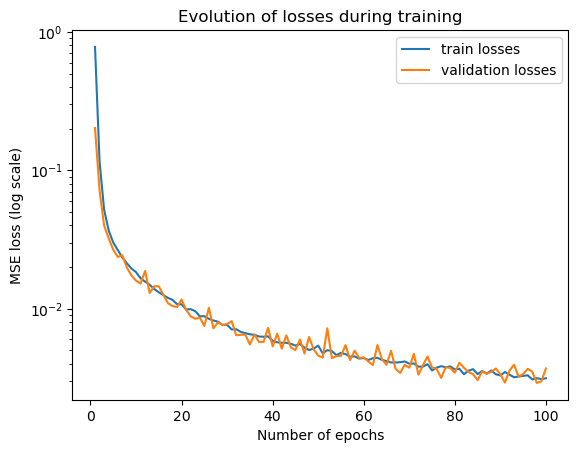

In [ ]:
plt.plot(np.arange(len(trained_model_3.train_losses))+1, trained_model_3.train_losses, label='train losses')
plt.plot(np.arange(len(trained_model_3.validation_losses))+1, trained_model_3.validation_losses, label='validation losses')
plt.legend()
plt.xlabel('Number of epochs')
plt.ylabel('MSE loss (log scale)')
plt.yscale('log')
plt.title("Evolution of losses during training")
plt.show()

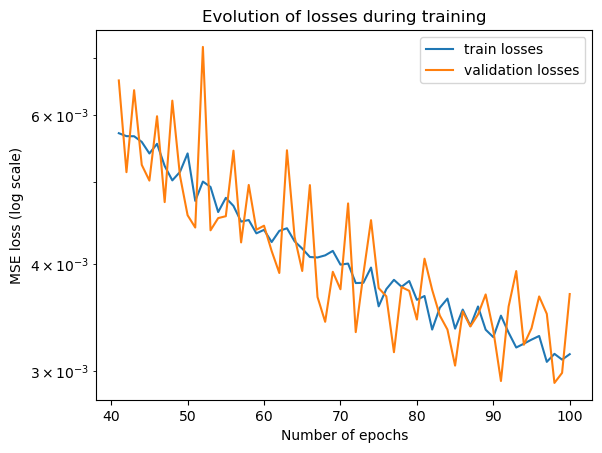

In [ ]:
plt.plot(np.arange(len(trained_model_3.train_losses[40:]))+41, trained_model_3.train_losses[40:], label='train losses')
plt.plot(np.arange(len(trained_model_3.validation_losses[40:]))+41, trained_model_3.validation_losses[40:], label='validation losses')
plt.legend()
plt.xlabel('Number of epochs')
plt.ylabel('MSE loss (log scale)')
plt.yscale('log')
plt.title("Evolution of losses during training")
plt.show()

## F) RESULTS

In [ ]:

# Evaluate the model on the test set
test_loss = evaluate_model(trained_model_3, test_loader, custom_loss, device)
print(f"Test Loss: {test_loss:.6f}")


Test Loss: 0.003740


## G) Postprocess

In [ ]:
outputs = trained_model_3(*torch.split(test_X[0:10], 1, dim=1))

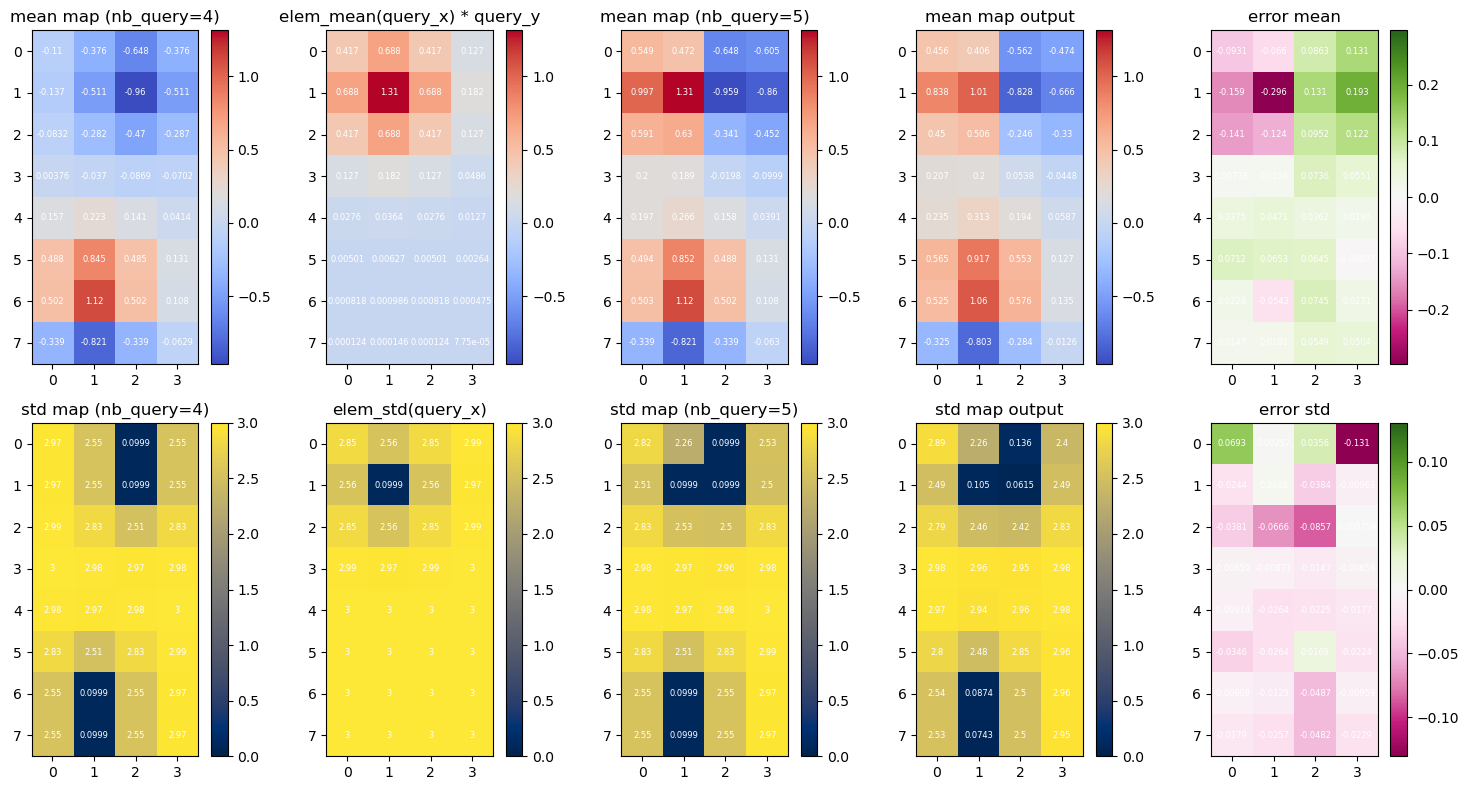

In [ ]:
compare_output_label(train_input=test_X, train_label=test_Y, output=outputs.detach(), comb_idx=0, values=True)

In [ ]:
plot_combinations(train_input=test_X, train_label=test_Y, output=outputs.detach(), comb_idx_range=(0, 9), values=True)

NameError: name 'test_X' is not defined

In [67]:
# Chargement
checkpoint = torch.load("model/model1_10epochs_1280kaugtraindata.pth", weights_only=True)

model_t = MapUpdateNetwork_1()
optimizer_t = optim.Adam(model_1.parameters(), lr=1e-3)

# Charger les poids du modèle
model_t.load_state_dict(checkpoint['model_state_dict'])

# Charger l'état de l'optimiseur
optimizer_t.load_state_dict(checkpoint['optimizer_state_dict'])

# Charger les vecteurs
train_losses_t = checkpoint['train losses']
validation_losses_t = checkpoint['validation losses']

print('train losses', train_losses_t)
print('validation losses', validation_losses_t)

train losses [1.2695111989974976, 0.6667534351348877, 0.24532858401536942, 0.13335955075919628, 0.09978922329843044, 0.07572225213050843, 0.05938688766211271, 0.049660812728106976, 0.04292298424988985, 0.03924452718347311]
validation losses [1.0048306345939637, 0.3742048263549805, 0.167995947599411, 0.12530122101306915, 0.0975072667002678, 0.07232256084680558, 0.05960277393460274, 0.04906959161162376, 0.044659266620874404, 0.04140175953507423]


In [69]:
# Evaluate the model on the test set
test_losses_t = evaluate_model(model_t, test_loader, custom_loss, device)
print(f"Test Loss: {test_losses_t:.6f}")

Test Loss: 0.041128
